In [1]:
# set up path to facenet_pytorch_c
import sys
sys.path.insert(1, '/home/ubuntu/mtcnn')

In [2]:
# facenet_pytorch_c: avoid confusion with system default facenet_pytorch
from facenet_pytorch_c import MTCNN

In [3]:

from tqdm import tqdm
import numpy as np
import os


In [4]:
# pytorch
import torch
import torch.optim as optim
from torch import nn

# data handling
from torch.utils.data import DataLoader

# torchvision libs
from torchvision import datasets
from torchvision import transforms


In [5]:
# other custom scripts
import utils


In [6]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Available device: " + str(device))

# training hyperparameters
learning_rate = 1e-3
epochs = 30
decay_step = [15]
decay_rate = 0.1
opt = 'Adam'    # either Adam or SGD
batch_size = 64


Available device: cuda:0


In [7]:
# data loading parameters
workers = 4
resize_shape = (224, 224)

In [8]:
# get data
x_train, age_train, x_valid, age_valid, fnames = utils.get_images(
    r'/home/ubuntu/UTKFace', resize_shape=resize_shape
    )

100%|██████████| 37677/37677 [06:43<00:00, 93.37it/s]


In [9]:
# setup mtcnn
"""
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True, keep_all=True,
    device=device
)
"""
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.1, 0.5, 0.7], factor=0.709, post_process=True, keep_all=True,
    device=device
)

  4%|▍         | 1485/37677 [00:53<26:55, 22.41it/s]

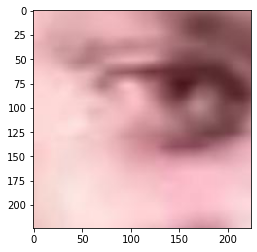

  4%|▍         | 1488/37677 [00:54<37:29, 16.09it/s]

file name: 18_0_1_20170113175821404.jpg.chip.jpg


  4%|▍         | 1503/37677 [00:54<29:48, 20.22it/s]

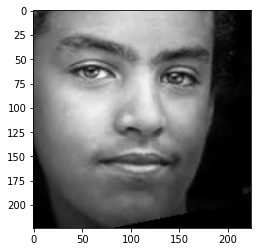

  4%|▍         | 1506/37677 [00:55<38:54, 15.50it/s]

file name: 18_0_1_20170117140107728.jpg.chip.jpg


  4%|▍         | 1576/37677 [00:57<18:38, 32.27it/s]

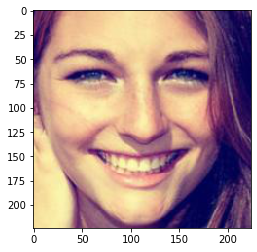

  4%|▍         | 1583/37677 [00:58<26:03, 23.09it/s]

file name: 18_1_0_20170109213049651.jpg.chip.jpg


  5%|▌         | 1970/37677 [01:11<16:15, 36.60it/s]

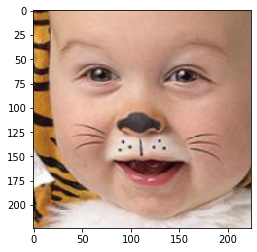

  5%|▌         | 1978/37677 [01:12<22:29, 26.46it/s]

file name: 1_0_0_20170109192836519.jpg.chip.jpg


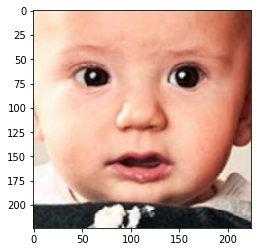

  5%|▌         | 1986/37677 [01:12<25:58, 22.89it/s]

file name: 1_0_0_20170109193823674.jpg.chip.jpg


  7%|▋         | 2602/37677 [01:29<14:41, 39.78it/s]

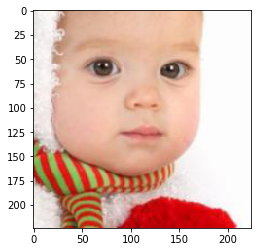

  7%|▋         | 2610/37677 [01:29<21:00, 27.82it/s]

file name: 1_1_0_20170109190818115.jpg.chip.jpg


  7%|▋         | 2683/37677 [01:31<15:32, 37.54it/s]

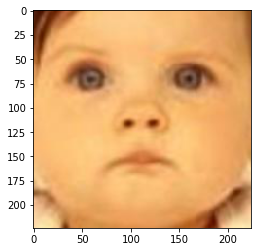

  7%|▋         | 2691/37677 [01:31<21:45, 26.80it/s]

file name: 1_1_0_20170109194244035.jpg.chip.jpg


  8%|▊         | 3027/37677 [01:41<16:08, 35.77it/s]

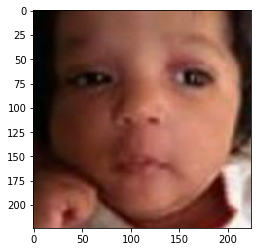

  8%|▊         | 3031/37677 [01:41<25:51, 22.32it/s]

file name: 1_1_4_20170103212116187.jpg.chip.jpg


  9%|▉         | 3466/37677 [01:58<25:03, 22.75it/s]

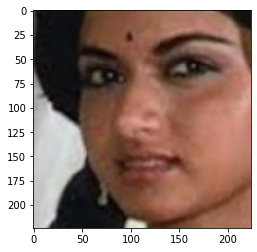

  9%|▉         | 3473/37677 [01:59<29:33, 19.29it/s]

file name: 20_1_3_20170119153750257.jpg.chip.jpg


 10%|▉         | 3733/37677 [02:09<20:59, 26.94it/s]

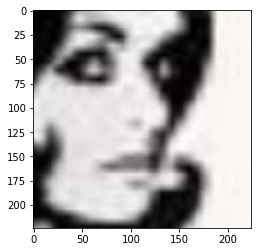

 10%|▉         | 3739/37677 [02:09<27:59, 20.21it/s]

file name: 21_1_0_20170116215627769.jpg.chip.jpg


 12%|█▏        | 4352/37677 [02:34<20:29, 27.11it/s]

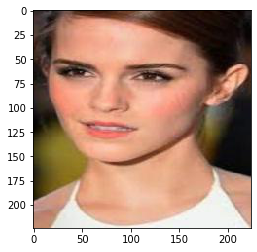

 12%|█▏        | 4358/37677 [02:34<28:11, 19.70it/s]

file name: 22_1_0_20170117143206386.jpg


 13%|█▎        | 5060/37677 [03:02<21:18, 25.52it/s]

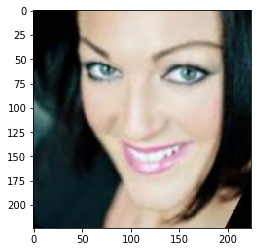

 13%|█▎        | 5066/37677 [03:02<29:45, 18.26it/s]

file name: 23_1_0_20170116221851470.jpg.chip.jpg


 15%|█▍        | 5570/37677 [03:22<21:22, 25.04it/s]

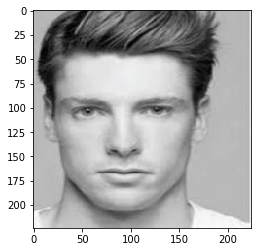

 15%|█▍        | 5576/37677 [03:23<28:13, 18.96it/s]

file name: 24_0_0_20170117150015076.jpg


 15%|█▌        | 5661/37677 [03:26<22:05, 24.15it/s]

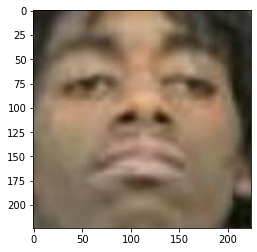

 15%|█▌        | 5667/37677 [03:27<30:14, 17.64it/s]

file name: 24_0_1_20170116000638538.jpg.chip.jpg


 16%|█▌        | 5847/37677 [03:34<22:15, 23.83it/s]

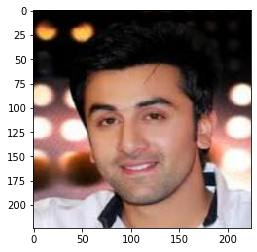

 16%|█▌        | 5853/37677 [03:34<29:43, 17.85it/s]

file name: 24_0_3_20170117150025331.jpg


 16%|█▌        | 6091/37677 [03:43<22:54, 22.97it/s]

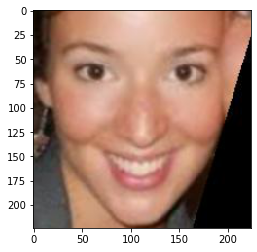

 16%|█▌        | 6098/37677 [03:44<26:26, 19.91it/s]

file name: 24_1_0_20170117120938226.jpg.chip.jpg


 16%|█▌        | 6107/37677 [03:44<23:41, 22.21it/s]

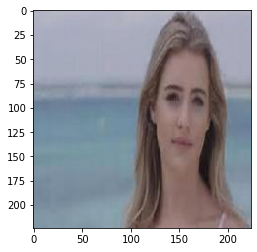

 16%|█▌        | 6113/37677 [03:45<33:29, 15.71it/s]

file name: 24_1_0_20170117150326821.jpg


 17%|█▋        | 6412/37677 [03:58<19:33, 26.64it/s]

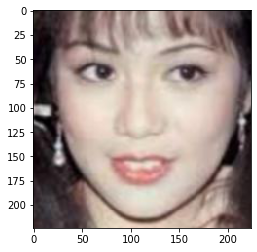

 17%|█▋        | 6415/37677 [03:58<29:38, 17.58it/s]

file name: 24_1_2_20170116163049260.jpg.chip.jpg


 18%|█▊        | 6818/37677 [04:13<22:11, 23.17it/s]

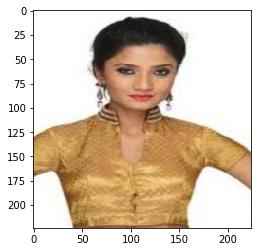

 18%|█▊        | 6823/37677 [04:14<30:12, 17.02it/s]

file name: 24_1_3_20170119164644510.jpg


 22%|██▏       | 8171/37677 [05:08<20:52, 23.56it/s]

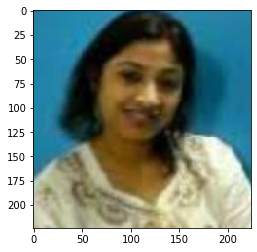

 22%|██▏       | 8177/37677 [05:09<25:32, 19.25it/s]

file name: 25_1_3_20170119151009470.jpg


 22%|██▏       | 8359/37677 [05:16<25:13, 19.36it/s]

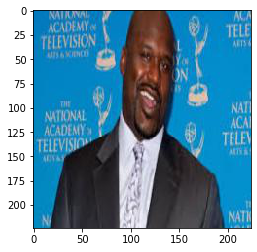

 22%|██▏       | 8364/37677 [05:17<33:55, 14.40it/s]

file name: 26_0_0_20170113210126011.jpg


 22%|██▏       | 8400/37677 [05:19<26:02, 18.74it/s]

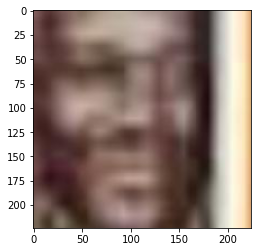

 22%|██▏       | 8404/37677 [05:19<37:36, 12.98it/s]

file name: 26_0_0_20170113210127395.jpg.chip.jpg


 22%|██▏       | 8421/37677 [05:20<28:44, 16.97it/s]

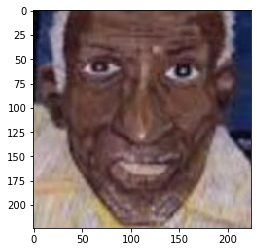

 22%|██▏       | 8425/37677 [05:20<37:54, 12.86it/s]

file name: 26_0_0_20170113210319560.jpg.chip.jpg


 23%|██▎       | 8674/37677 [05:30<19:09, 25.23it/s]

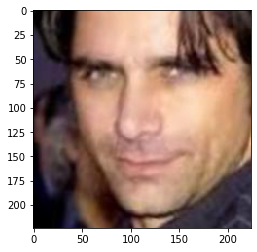

 23%|██▎       | 8680/37677 [05:31<25:47, 18.74it/s]

file name: 26_0_0_20170117172649700.jpg.chip.jpg


 23%|██▎       | 8762/37677 [05:34<19:17, 24.99it/s]

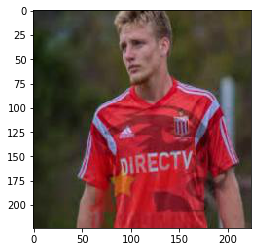

 23%|██▎       | 8768/37677 [05:34<26:35, 18.12it/s]

file name: 26_0_0_20170117200135805.jpg


 24%|██▍       | 8968/37677 [05:43<22:03, 21.69it/s]

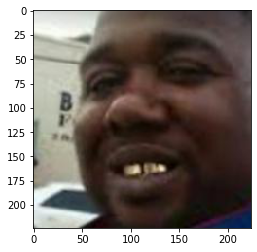

 24%|██▍       | 8974/37677 [05:43<26:57, 17.74it/s]

file name: 26_0_1_20170113151947665.jpg.chip.jpg


 24%|██▍       | 9140/37677 [05:51<19:45, 24.07it/s]

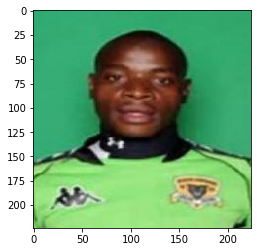

 24%|██▍       | 9146/37677 [05:51<25:52, 18.38it/s]

file name: 26_0_1_20170116183512340.jpg


 25%|██▍       | 9243/37677 [05:56<19:13, 24.65it/s]

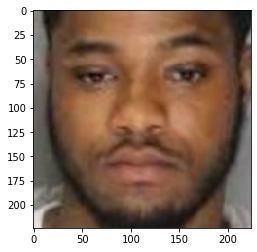

 25%|██▍       | 9246/37677 [05:56<29:16, 16.19it/s]

file name: 26_0_1_20170116214531552.jpg.chip.jpg


 25%|██▍       | 9302/37677 [05:58<21:32, 21.95it/s]

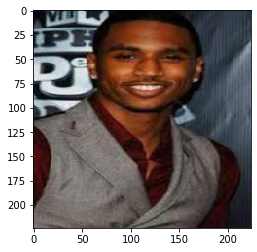

 25%|██▍       | 9305/37677 [05:59<31:48, 14.87it/s]

file name: 26_0_1_20170117170851628.jpg


 25%|██▌       | 9477/37677 [06:06<20:23, 23.04it/s]

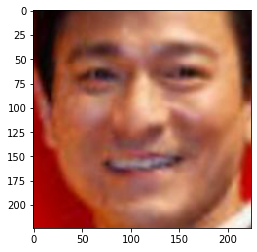

 25%|██▌       | 9480/37677 [06:06<30:32, 15.39it/s]

file name: 26_0_2_20170116181222639.jpg.chip.jpg


 26%|██▋       | 9965/37677 [06:25<18:37, 24.81it/s]

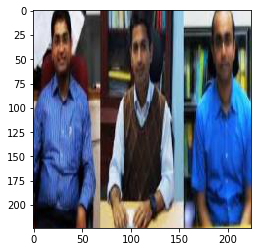

 26%|██▋       | 9970/37677 [06:26<28:13, 16.36it/s]

file name: 26_0_3_20170119184335552.jpg


 27%|██▋       | 10329/37677 [06:40<18:17, 24.93it/s]

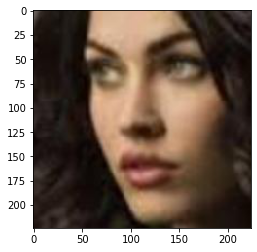

 27%|██▋       | 10332/37677 [06:40<26:51, 16.97it/s]

file name: 26_1_0_20170116235548284.jpg.chip.jpg


 28%|██▊       | 10415/37677 [06:43<18:35, 24.43it/s]

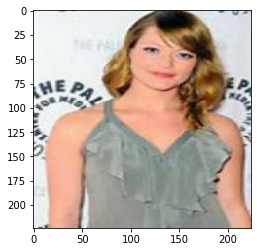

 28%|██▊       | 10421/37677 [06:44<25:11, 18.04it/s]

file name: 26_1_0_20170117153205725.jpg


 29%|██▊       | 10816/37677 [07:02<23:03, 19.42it/s]

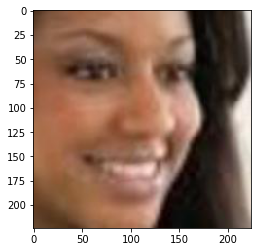

 29%|██▊       | 10821/37677 [07:02<28:21, 15.78it/s]

file name: 26_1_1_20170113011815991.jpg.chip.jpg


 29%|██▉       | 10883/37677 [07:05<22:38, 19.73it/s]

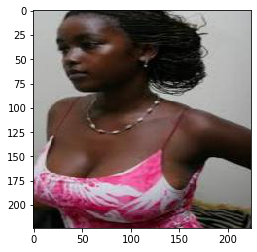

 29%|██▉       | 10886/37677 [07:05<30:19, 14.72it/s]

file name: 26_1_1_20170116011425192.jpg


 29%|██▉       | 11094/37677 [07:16<22:59, 19.27it/s]

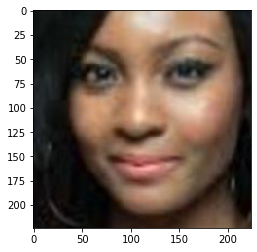

 29%|██▉       | 11099/37677 [07:16<29:55, 14.80it/s]

file name: 26_1_1_20170116222929223.jpg.chip.jpg


 30%|███       | 11426/37677 [07:30<16:12, 27.00it/s]

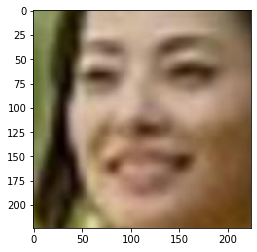

 30%|███       | 11429/37677 [07:30<23:59, 18.24it/s]

file name: 26_1_2_20170116175858597.jpg.chip.jpg


 31%|███       | 11598/37677 [07:37<19:35, 22.18it/s]

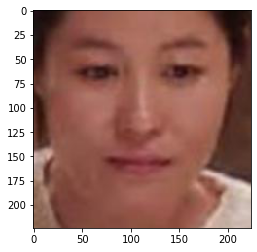

file name: 26_1_2_20170116184044516.jpg.chip.jpg


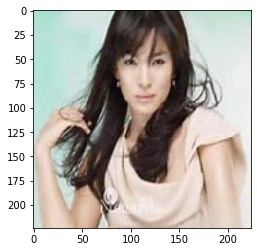

 31%|███       | 11601/37677 [07:37<37:48, 11.49it/s]

file name: 26_1_2_20170116184045356.jpg


 37%|███▋      | 13975/37677 [09:17<17:56, 22.02it/s]

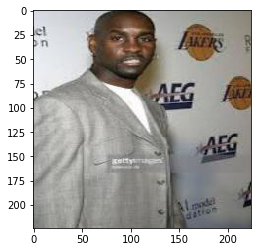

 37%|███▋      | 13981/37677 [09:17<22:41, 17.41it/s]

file name: 28_0_1_20170116200710476.jpg


 38%|███▊      | 14212/37677 [09:27<16:22, 23.89it/s]

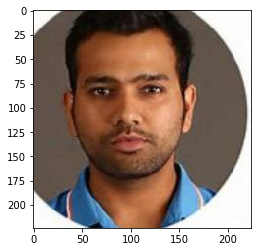

 38%|███▊      | 14215/37677 [09:28<23:24, 16.70it/s]

file name: 28_0_3_20170117020733772.jpg


 38%|███▊      | 14372/37677 [09:34<18:28, 21.03it/s]

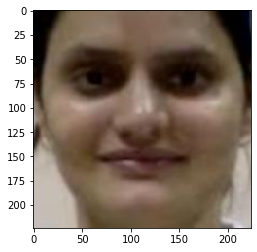

 38%|███▊      | 14378/37677 [09:34<21:22, 18.16it/s]

file name: 28_0_3_20170119194930475.jpg.chip.jpg


 39%|███▊      | 14584/37677 [09:42<17:02, 22.58it/s]

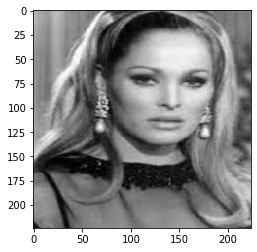

 39%|███▊      | 14590/37677 [09:43<21:50, 17.61it/s]

file name: 28_1_0_20170117122008648.jpg


 41%|████      | 15324/37677 [10:13<15:33, 23.96it/s]

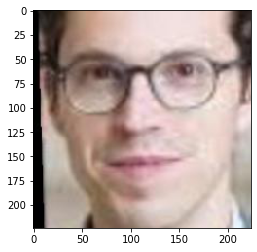

 41%|████      | 15327/37677 [10:13<24:17, 15.34it/s]

file name: 29_0_0_20170117120426927.jpg.chip.jpg


 41%|████      | 15478/37677 [10:20<16:06, 22.96it/s]

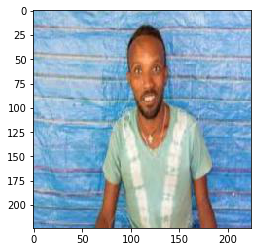

 41%|████      | 15481/37677 [10:20<24:39, 15.00it/s]

file name: 29_0_1_20170116142845616.jpg


 41%|████▏     | 15603/37677 [10:26<15:05, 24.38it/s]

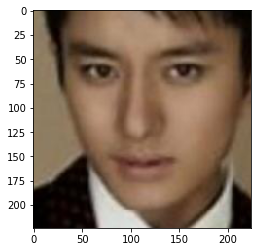

 41%|████▏     | 15609/37677 [10:26<20:17, 18.12it/s]

file name: 29_0_2_20170116163356668.jpg.chip.jpg


 42%|████▏     | 15957/37677 [10:41<17:13, 21.02it/s]

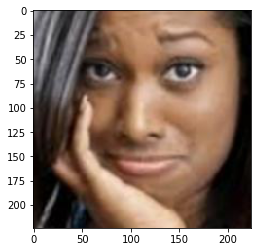

 42%|████▏     | 15962/37677 [10:41<23:27, 15.43it/s]

file name: 29_1_1_20170113012341792.jpg.chip.jpg


 47%|████▋     | 17545/37677 [11:39<14:03, 23.86it/s]

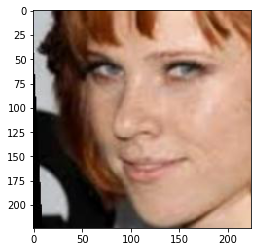

 47%|████▋     | 17550/37677 [11:40<20:45, 16.16it/s]

file name: 30_1_0_20170117152122396.jpg.chip.jpg


 48%|████▊     | 18232/37677 [12:09<13:17, 24.38it/s]

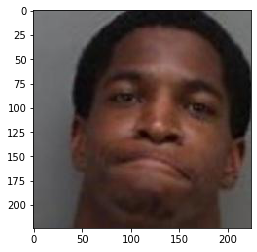

 48%|████▊     | 18240/37677 [12:09<14:59, 21.60it/s]

file name: 31_0_1_20170117135112522.jpg


 49%|████▉     | 18543/37677 [12:22<13:25, 23.75it/s]

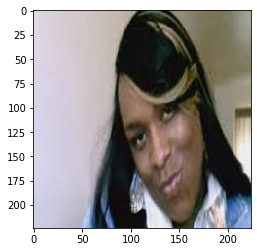

 49%|████▉     | 18546/37677 [12:22<18:35, 17.15it/s]

file name: 31_1_1_20170117005813452.jpg


 52%|█████▏    | 19713/37677 [13:11<12:13, 24.48it/s]

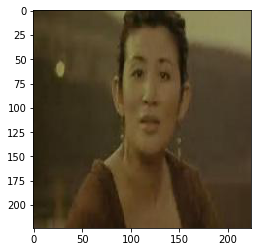

 52%|█████▏    | 19719/37677 [13:11<15:38, 19.14it/s]

file name: 32_1_2_20170116164214489.jpg


 53%|█████▎    | 19805/37677 [13:14<10:41, 27.86it/s]

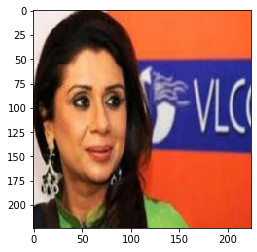

 53%|█████▎    | 19811/37677 [13:15<17:13, 17.29it/s]

file name: 32_1_3_20170119200439598.jpg


 55%|█████▍    | 20676/37677 [13:50<11:41, 24.22it/s]

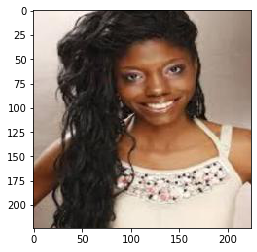

 55%|█████▍    | 20682/37677 [13:51<15:56, 17.76it/s]

file name: 34_1_1_20170113005245917.jpg


 55%|█████▌    | 20808/37677 [13:56<10:14, 27.44it/s]

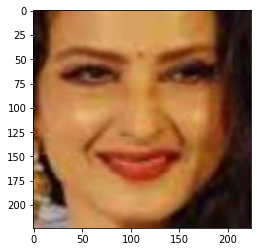

 55%|█████▌    | 20815/37677 [13:56<14:39, 19.18it/s]

file name: 34_1_3_20170119200905525.jpg.chip.jpg


 55%|█████▌    | 20904/37677 [14:00<10:53, 25.66it/s]

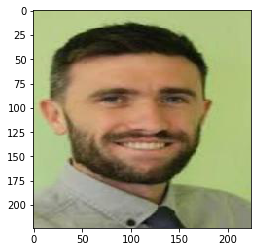

 55%|█████▌    | 20910/37677 [14:00<13:51, 20.18it/s]

file name: 35_0_0_20170116223921881.jpg


 56%|█████▌    | 20966/37677 [14:02<11:01, 25.27it/s]

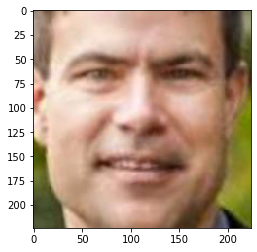

 56%|█████▌    | 20972/37677 [14:03<14:17, 19.49it/s]

file name: 35_0_0_20170117134936879.jpg.chip.jpg


 57%|█████▋    | 21292/37677 [14:16<11:27, 23.83it/s]

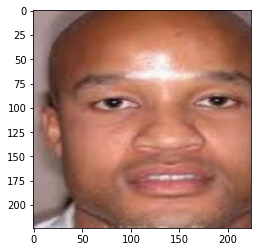

 57%|█████▋    | 21298/37677 [14:17<18:35, 14.68it/s]

file name: 35_0_1_20170113155203994.jpg


 58%|█████▊    | 21699/37677 [14:34<12:23, 21.49it/s]

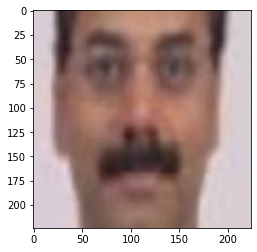

 58%|█████▊    | 21702/37677 [14:34<16:35, 16.05it/s]

file name: 35_0_3_20170119191827257.jpg.chip.jpg


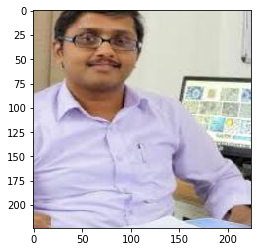

 58%|█████▊    | 21707/37677 [14:34<19:47, 13.45it/s]

file name: 35_0_3_20170119191930010.jpg


 58%|█████▊    | 21735/37677 [14:35<11:05, 23.97it/s]

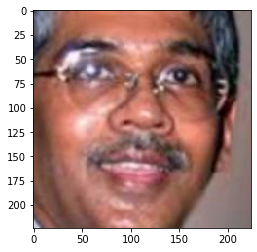

 58%|█████▊    | 21741/37677 [14:36<15:32, 17.09it/s]

file name: 35_0_3_20170119201340627.jpg.chip.jpg


 59%|█████▉    | 22150/37677 [14:53<11:30, 22.48it/s]

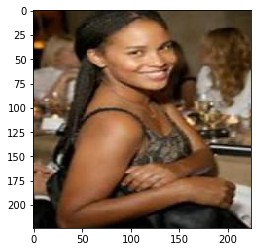

 59%|█████▉    | 22153/37677 [14:53<16:34, 15.61it/s]

file name: 35_1_1_20170113001901555.jpg


 59%|█████▉    | 22384/37677 [15:03<10:22, 24.57it/s]

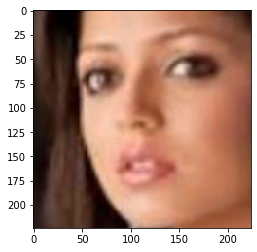

 59%|█████▉    | 22391/37677 [15:03<13:06, 19.43it/s]

file name: 35_1_3_20170117183032742.jpg.chip.jpg


 61%|██████▏   | 23141/37677 [15:35<12:20, 19.62it/s]

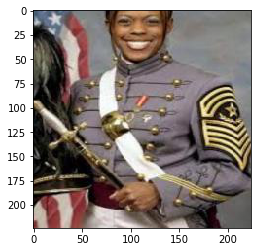

 61%|██████▏   | 23146/37677 [15:36<17:19, 13.98it/s]

file name: 36_1_1_20170113011647678.jpg


 62%|██████▏   | 23329/37677 [15:43<09:13, 25.90it/s]

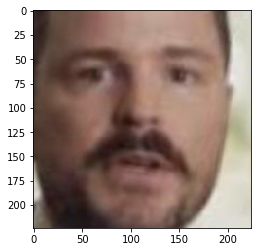

file name: 37_0_0_20170105172702509.jpg.chip.jpg


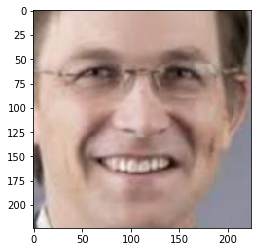

 62%|██████▏   | 23335/37677 [15:44<15:32, 15.38it/s]

file name: 37_0_0_20170105172903283.jpg.chip.jpg


 62%|██████▏   | 23382/37677 [15:46<10:52, 21.91it/s]

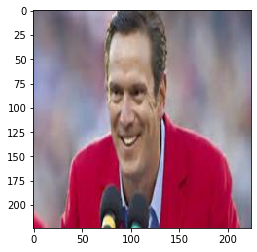

 62%|██████▏   | 23385/37677 [15:46<16:38, 14.32it/s]

file name: 37_0_0_20170117140126967.jpg


 62%|██████▏   | 23389/37677 [15:47<15:05, 15.78it/s]

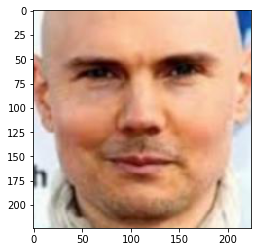

 62%|██████▏   | 23395/37677 [15:47<16:28, 14.44it/s]

file name: 37_0_0_20170117141403657.jpg.chip.jpg


 62%|██████▏   | 23397/37677 [15:47<15:40, 15.18it/s]

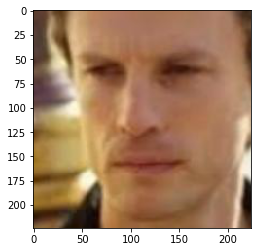

 62%|██████▏   | 23401/37677 [15:48<19:41, 12.08it/s]

file name: 37_0_0_20170117171523531.jpg.chip.jpg


 63%|██████▎   | 23854/37677 [16:06<09:39, 23.87it/s]

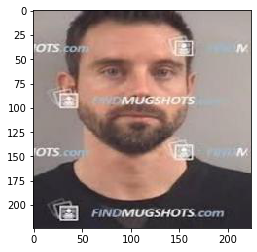

 63%|██████▎   | 23860/37677 [16:06<12:50, 17.92it/s]

file name: 38_0_0_20170117120714034.jpg


 67%|██████▋   | 25156/37677 [16:56<08:02, 25.95it/s]

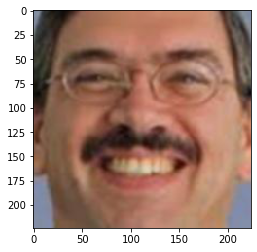

 67%|██████▋   | 25159/37677 [16:56<12:48, 16.29it/s]

file name: 40_0_0_20170116233131287.jpg.chip.jpg


 69%|██████▊   | 25836/37677 [17:24<09:49, 20.07it/s]

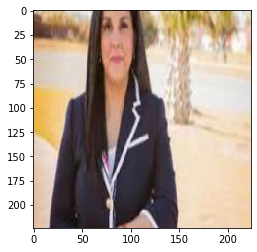

 69%|██████▊   | 25842/37677 [17:25<11:46, 16.75it/s]

file name: 40_1_0_20170117194649491.jpg


 71%|███████   | 26687/37677 [17:59<06:54, 26.49it/s]

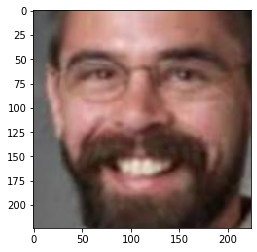

 71%|███████   | 26690/37677 [18:00<10:37, 17.24it/s]

file name: 43_0_0_20170104205923244.jpg.chip.jpg


 71%|███████▏  | 26898/37677 [18:08<07:32, 23.80it/s]

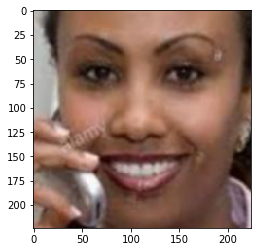

 71%|███████▏  | 26904/37677 [18:09<10:08, 17.70it/s]

file name: 43_1_1_20170116233041044.jpg.chip.jpg


 74%|███████▎  | 27705/37677 [18:41<06:35, 25.18it/s]

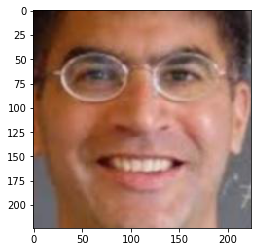

 74%|███████▎  | 27711/37677 [18:42<10:43, 15.48it/s]

file name: 45_0_4_20170104194522552.jpg.chip.jpg


 78%|███████▊  | 29271/37677 [19:42<05:08, 27.26it/s]

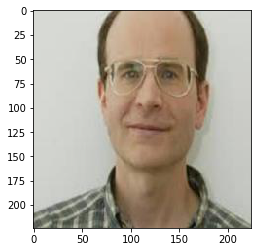

 78%|███████▊  | 29277/37677 [19:42<07:01, 19.91it/s]

file name: 50_0_0_20170117154157436.jpg


 80%|████████  | 30251/37677 [20:22<04:39, 26.56it/s]

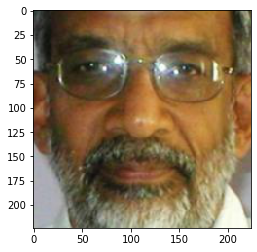

 80%|████████  | 30257/37677 [20:23<06:40, 18.51it/s]

file name: 52_0_3_20170119205647136.jpg.chip.jpg


 82%|████████▏ | 30917/37677 [20:49<05:02, 22.34it/s]

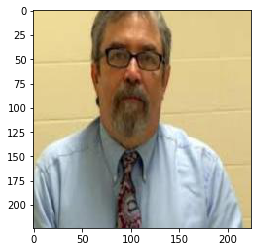

 82%|████████▏ | 30922/37677 [20:50<06:53, 16.35it/s]

file name: 54_0_0_20170120223348956.jpg


 86%|████████▌ | 32293/37677 [21:45<03:33, 25.26it/s]

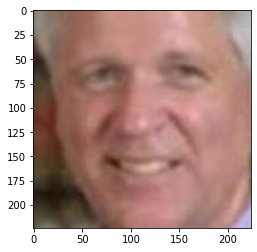

 86%|████████▌ | 32299/37677 [21:45<05:02, 17.78it/s]

file name: 58_0_0_20170109013800693.jpg.chip.jpg


 87%|████████▋ | 32627/37677 [21:59<03:37, 23.26it/s]

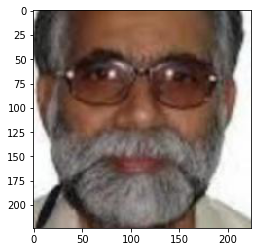

 87%|████████▋ | 32633/37677 [22:00<04:35, 18.34it/s]

file name: 58_0_3_20170119211703657.jpg.chip.jpg


 88%|████████▊ | 33094/37677 [22:16<02:58, 25.63it/s]

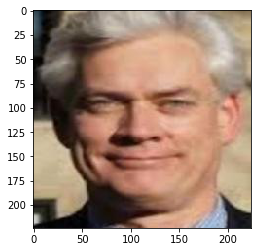

 88%|████████▊ | 33097/37677 [22:16<04:38, 16.42it/s]

file name: 60_0_0_20170117135052544.jpg


 89%|████████▉ | 33508/37677 [22:33<03:20, 20.77it/s]

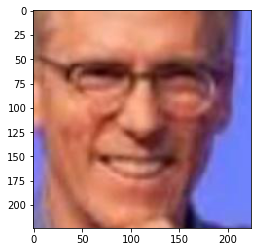

 89%|████████▉ | 33511/37677 [22:33<04:57, 13.99it/s]

file name: 61_0_0_20170117174441717.jpg.chip.jpg


 89%|████████▉ | 33650/37677 [22:39<03:10, 21.14it/s]

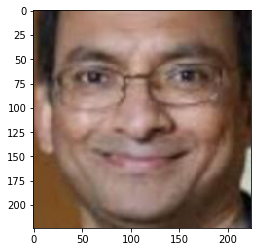

 89%|████████▉ | 33656/37677 [22:39<04:23, 15.25it/s]

file name: 61_0_3_20170117174814245.jpg.chip.jpg


 91%|█████████ | 34256/37677 [23:04<02:50, 20.06it/s]

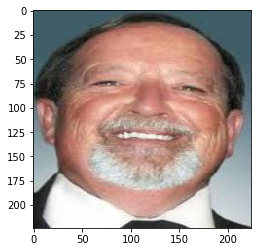

 91%|█████████ | 34262/37677 [23:04<03:25, 16.60it/s]

file name: 65_0_0_20170117171624306.jpg


 93%|█████████▎| 35168/37677 [23:40<01:42, 24.55it/s]

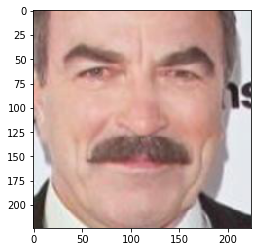

 93%|█████████▎| 35174/37677 [23:41<02:20, 17.87it/s]

file name: 70_0_0_20170111171747665.jpg.chip.jpg


 96%|█████████▋| 36352/37677 [24:30<01:24, 15.71it/s]

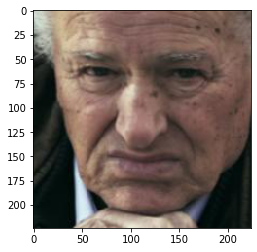

 96%|█████████▋| 36357/37677 [24:30<01:30, 14.60it/s]

file name: 80_0_0_20170111211628015.jpg.chip.jpg


 98%|█████████▊| 36870/37677 [24:52<00:33, 23.91it/s]

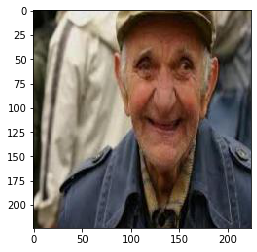

 98%|█████████▊| 36876/37677 [24:53<00:46, 17.33it/s]

file name: 86_0_0_20170112224722395.jpg


 98%|█████████▊| 36889/37677 [24:53<00:35, 22.19it/s]

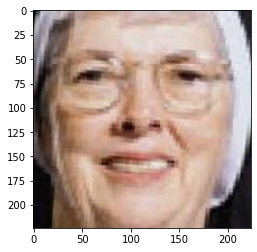

 98%|█████████▊| 36895/37677 [24:54<00:42, 18.36it/s]

file name: 86_1_0_20170110180108013.jpg.chip.jpg


 99%|█████████▉| 37242/37677 [25:07<00:15, 28.05it/s]

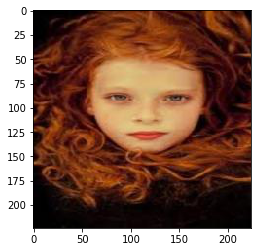

 99%|█████████▉| 37245/37677 [25:07<00:24, 17.56it/s]

file name: 8_1_0_20170117195424950.jpg


 99%|█████████▉| 37412/37677 [25:15<00:12, 21.94it/s]

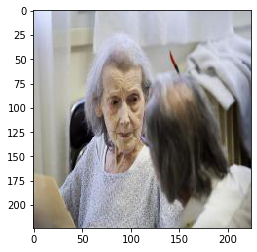

 99%|█████████▉| 37415/37677 [25:16<00:19, 13.32it/s]

file name: 90_1_0_20170120225510266.jpg


100%|█████████▉| 37588/37677 [25:21<00:03, 24.70it/s]

total: 37588; mtcnn fail count: 89


In [10]:
# use mtcnn to generate bbox & face_probs for each image in x_train and x_valid

# previous test result: (*.jpg): total: 37588; mtcnn fail count: 89
# fail rate: 0.2%

# pyplot, for debugging
import matplotlib.pyplot as plt

bbox_train = []
prob_train = []
bbox_valid = []
prob_valid = []

idx = 0
fail = 0
total = 0
for img in tqdm(x_train):
    total += 1
    bbox, prob = mtcnn(img, eval_mode=True)
    
    if bbox is None:
        # mtcnn failed to detect a face
        fail += 1
        plt.imshow(x_train[idx])
        plt.show()
        print("file name: {}".format(fnames[idx]))
        x_train.pop(idx)
        fnames.pop(idx)
        age_train.pop(idx)
    
    else:
        bbox_train.append(bbox[0])
        prob_train.append(prob)
        idx += 1

print("total: {}; mtcnn fail count: {}".format(total, fail))


In [ ]:
# define data reader

# no need to convert to PIL, because get_images already does that
transform_train = transforms.Compose([
    #transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    #transforms.ToTensor(),
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

# ignore validation for now
"""
transform_valid = transforms.Compose([
    #transforms.ToPILImage(),
    #transforms.ToTensor(),
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
"""

train_reader = DataLoader(
    utils.UTKDataLoader(x_train, y_train, tsfm=transform_train),
    batch_size=batch_size, num_workers=workers, shuffle=True
    )

"""
valid_reader = DataLoader(
    utils.UTKDataLoader(x_valid, y_valid, tsfm=transform_valid),
    batch_size=batch_size, num_workers=workers, shuffle=False
    )
"""